## matplotlib is low-level (base library)
- with matplotlib, we manually create each part of a plot:
    - the plot type (line, bar, scatter, etc)
    - the title
    - the legend
    - the axis ticks and labels
    - the grid
    - any annotations
- low level = full control, but more manual work

## pandas: simplified plotting from DataFrames/Series
- using pandas, it already have data in DataFrame or Series form
- it has built-in plotting methods that make visualization easier using `matplotlib` behind the scenes
- pandas = easier plotting for tabular data with minimal code

## seaborn: high-level statistical visualization
- built on top of matplotlib
- adds beautiful styles, themes, and built-in support for statistical plots like:
    - distribution plots (histograms, KDE)
    - box plots
    - violin plots
    - pair plots
    - heatmaps
- seaborn = high-level, attractive, statistical plotting made super easy

#### When to Use What?

- Use **matplotlib** when:
  - You need full customization.
  - You’re building complex, interactive, or highly styled plots.

- Use **pandas plotting** when:
  - You’re working with tabular data and want a quick, simple plot.

- Use **seaborn** when:
  - You want high-quality visuals and statistical insights easily.


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## Line Plots
- series and dataframe have a plot attribute for making some basic plot types.
- by default, plot() makes line plots

<Axes: >

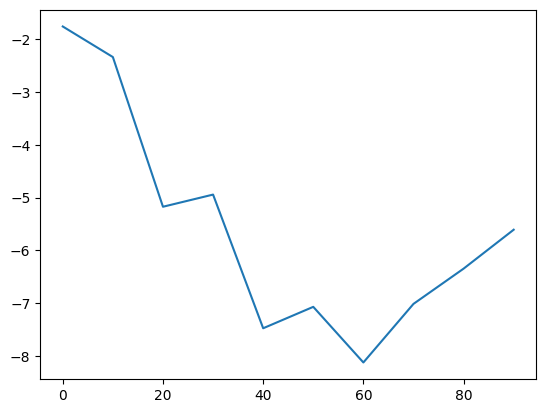

In [4]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

# the series object's index is passed to matplotlib for plotting on the x-axis, though we can disable this by passing `use_index=False`.

# the x-axis ticks and limits can be adjusted with the `xticks` and `xlim` options, and the y-axis respectively with `yticks` and `ylim`


#### `Series.plot()` – Common Arguments

```python
Series.plot(
    kind='line',         # Type of plot: 'line', 'bar', 'barh', 'hist', 'box', 'kde', etc.
    ax=None,             # Matplotlib Axes to plot on
    figsize=None,        # Tuple e.g., (width, height) in inches
    use_index=True,      # Use index for x-axis values
    title=None,          # Title of the plot
    grid=None,           # Show grid: True or False
    legend=False,        # Show legend
    style=None,          # Line style, marker, color (e.g., 'ro--' for red circles with dashed lines)
    logy=False,          # Logarithmic scale on y-axis
    color=None,          # Color of the line/bar
    label=None,          # Label for legend
    linewidth=None,      # Width of the line (for line plots)
    linestyle=None,      # Line style: '-', '--', '-.', ':', etc.
    alpha=None,          # Transparency from 0 (transparent) to 1 (opaque)
    rot=None,            # Rotation of x-axis labels
    xticks=None,         # Custom x-tick locations
    yticks=None,         # Custom y-tick locations
    xlim=None,           # x-axis limits (min, max)
    ylim=None,           # y-axis limits (min, max)
    fontsize=None,       # Font size for labels
    marker=None,         # Marker style: 'o', 'x', '^', etc.
    markersize=None,     # Size of the marker
    gridaxis='both',     # Which axis to apply the grid: 'x', 'y', 'both'
    **kwargs             # Other keyword args passed to matplotlib
)
```

#### Most Common Plot `kind` Values:
- `'line'` – default (time series, trend, etc.)
- `'bar'` – vertical bar plot
- `'barh'` – horizontal bar plot
- `'hist'` – histogram
- `'box'` – boxplot
- `'kde'` – kernel density estimate (smoothed histogram)
- `'area'` – area under the curve
- `'pie'` – pie chart (only for Series)

> Most of panda's plotting methods accept an optional ax parameter, which can be a matplotlib subplot object. This gives more flexible placement of subplots in a grid layout.

<Axes: >

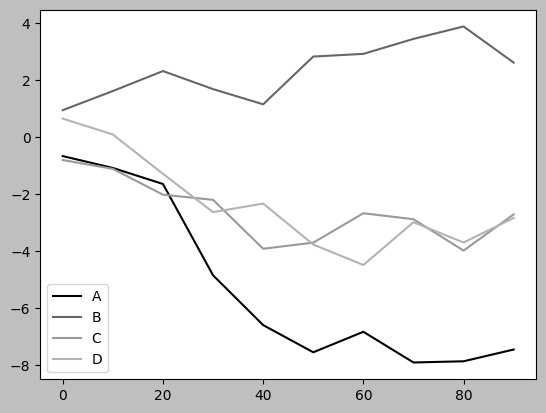

In [5]:
# dataframe's plot method plots each of its columns as as different line on the same subplot, creating a legend automatically

df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0), 
                  columns=["A", "B", "C", "D"], 
                  index=np.arange(0, 100, 10))
plt.style.use("grayscale") # to switch to a color scheme more suitable for black and white publication,
df.plot()

# the plot attribute contains a "family" of methods for different plot types, example:
# df.plot() is equivalent to df.plot.line()

# additional keyword arguments to plot are passed through to the respective matplotlib plotting function, so you can further customize these plots by learning more about the matplotlib API.

# dataframe has a number of options allowing some flexibility for how the columns are handled, for example
    # whether to plot them all on the same subplot or to create separate subplots.



#### DataFrame plot Arguments 

| Argument        | Description |
|-----------------|-------------|
| `x`, `y`        | Specify column names for x and y axis |
| `kind`          | Type of plot to generate |
| `subplots`      | Plot each column in a separate subplot |
| `sharex`, `sharey` | Share x/y axes among subplots |
| `layout`        | Tuple (rows, cols) for subplots |
| `figsize`       | (width, height) of figure in inches |
| `use_index`     | Use DataFrame index for x-axis |
| `title`         | Title of the plot |
| `grid`          | Display grid (True/False) |
| `legend`        | Show legend (True/False) |
| `style`         | Style string or list (e.g., `'o--'`) |
| `logx`, `logy`  | Log scale on respective axes |
| `rot`           | Rotate x-axis tick labels |
| `fontsize`      | Font size for tick labels |
| `colormap`      | Colormap name or object (e.g., `'viridis'`) |
| `stacked`       | For `'bar'`/`'area'` plots; stack values |
| `alpha`         | Transparency from 0 to 1 |
| `secondary_y`   | Plot on secondary y-axis |
| `sort_columns`  | Sort columns before plotting |
| `table`         | Add table below the plot |
| `yerr`, `xerr`  | Error bars |
| `xticks`, `yticks` | Custom tick positions |
| `xlim`, `ylim`  | Axis limits |

#### Common `kind` Values

| Kind         | Description                   |
|--------------|-------------------------------|
| `'line'`     | Default line plot             |
| `'bar'`      | Vertical bar plot             |
| `'barh'`     | Horizontal bar plot           |
| `'hist'`     | Histogram                     |
| `'box'`      | Boxplot                       |
| `'kde'`      | Kernel Density Estimation     |
| `'density'`  | Alias for `'kde'`             |
| `'area'`     | Area plot                     |
| `'pie'`      | Pie chart (only for Series)   |
| `'scatter'`  | Scatter plot                  |
| `'hexbin'`   | Hexagonal binning plot        |
